In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [31]:
data=pd.read_csv("Heart Prediction Quantum Dataset.csv")
data.head(5)

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
0,68,1,105,191,107,8.362241,1
1,58,0,97,249,89,9.249002,0
2,44,0,93,190,82,7.942542,1
3,72,1,93,183,101,6.495155,1
4,37,0,145,166,103,7.653900,1


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    500 non-null    int64  
 1   Gender                 500 non-null    int64  
 2   BloodPressure          500 non-null    int64  
 3   Cholesterol            500 non-null    int64  
 4   HeartRate              500 non-null    int64  
 5   QuantumPatternFeature  500 non-null    float64
 6   HeartDisease           500 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 27.5 KB


In [33]:
data.isnull().sum()

Age                      0
Gender                   0
BloodPressure            0
Cholesterol              0
HeartRate                0
QuantumPatternFeature    0
HeartDisease             0
dtype: int64

In [34]:
data.duplicated().sum()

0

# Feature Engineering

In [35]:
x=data.drop(["HeartDisease"],axis=1)
y=data["HeartDisease"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Classifiers

In [36]:
models = {
    "Random Forest Classifier": RandomForestClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes Classifier": GaussianNB(),
    "Gradient Boosting Classifier": GradientBoostingClassifier()
}

# Hyperparameter Tuning

In [37]:
param_grid = {
    "Random Forest Classifier": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "bootstrap": [True, False]
    },
    "Decision Tree Classifier": {
        "criterion": ["gini", "entropy"],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "K-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan", "minkowski"]
    },
    "Logistic Regression": {
        "penalty": ["l1", "l2", "elasticnet", None],
        "C": [0.01, 0.1, 1, 10, 100],
        "solver": ["liblinear", "lbfgs", "saga"]
    },
    "Naive Bayes Classifier": {
        "var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6]
    },
    "Gradient Boosting Classifier": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2, 0.3],
        "max_depth": [3, 5, 10],
        "subsample": [0.7, 0.8, 0.9, 1.0]
    }
}


In [38]:
best_models = {}
for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    param_search = RandomizedSearchCV(
        model, param_grid[model_name], 
        n_iter=20, scoring='accuracy', 
        cv=5, random_state=42, n_jobs=-1
    )
    param_search.fit(x_train, y_train)
    best_models[model_name] = param_search.best_estimator_
    print(f"Best parameters for {model_name}: {param_search.best_params_}\n")

Tuning Random Forest Classifier...
Best parameters for Random Forest Classifier: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': True}

Tuning Decision Tree Classifier...
Best parameters for Decision Tree Classifier: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10, 'criterion': 'gini'}

Tuning K-Nearest Neighbors...
Best parameters for K-Nearest Neighbors: {'weights': 'uniform', 'n_neighbors': 7, 'metric': 'manhattan'}

Tuning Logistic Regression...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The ma

Best parameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l1', 'C': 100}

Tuning Naive Bayes Classifier...
Best parameters for Naive Bayes Classifier: {'var_smoothing': 1e-09}

Tuning Gradient Boosting Classifier...
Best parameters for Gradient Boosting Classifier: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.3}



# Result

In [39]:
for model_name, model in best_models.items():
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

Random Forest Classifier Accuracy: 0.9300
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        40
           1       1.00      0.88      0.94        60

    accuracy                           0.93       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.93      0.93       100

Decision Tree Classifier Accuracy: 0.9200
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        40
           1       0.96      0.90      0.93        60

    accuracy                           0.92       100
   macro avg       0.91      0.93      0.92       100
weighted avg       0.92      0.92      0.92       100

K-Nearest Neighbors Accuracy: 0.7400
              precision    recall  f1-score   support

           0       0.68      0.68      0.68        40
           1       0.78      0.78      0.78        60

    accuracy                           0.74       100
   macr

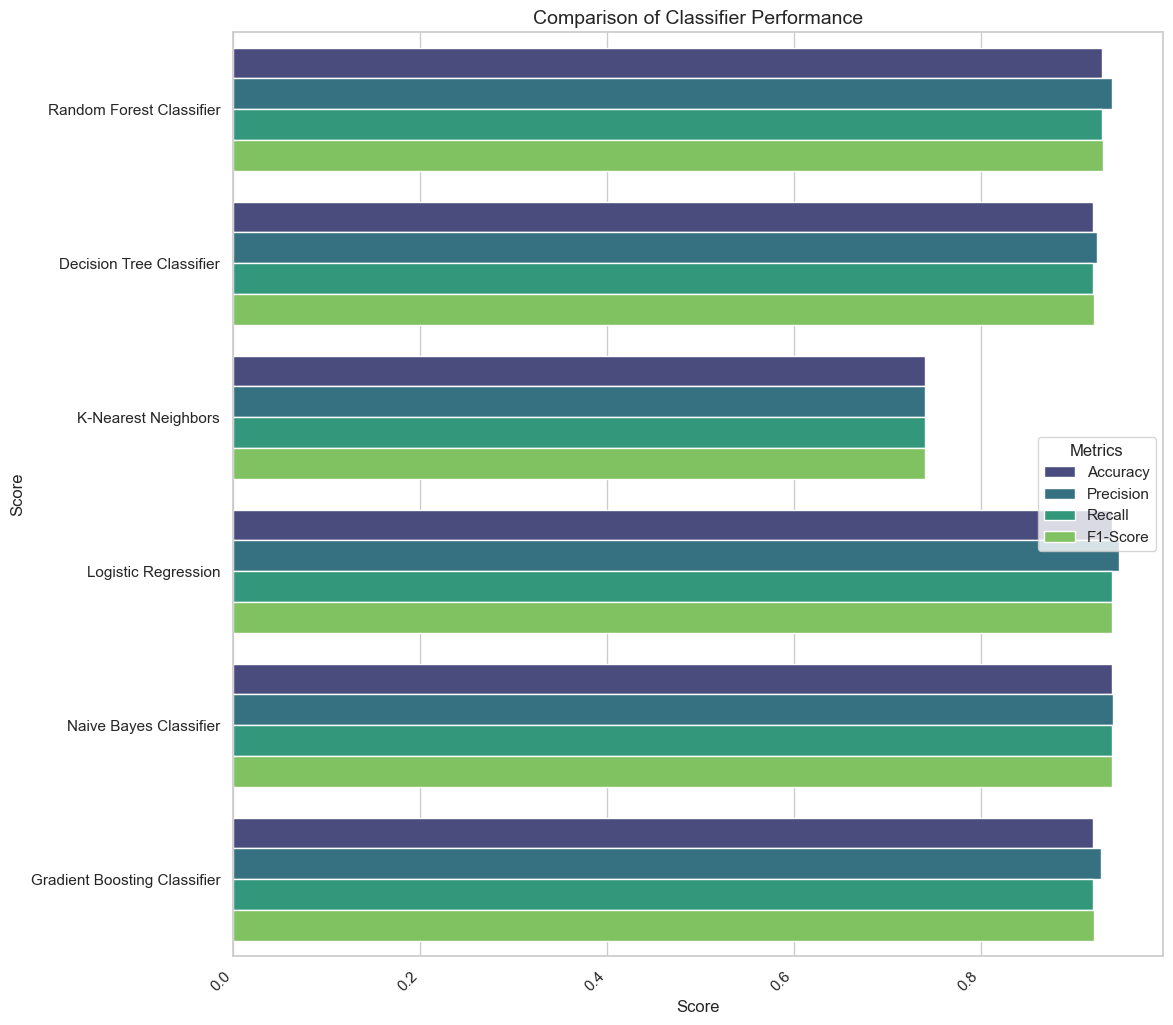

In [44]:
results = {
    "Classifier": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

for model_name, model in best_models.items():
    y_pred = model.predict(x_test)

    results["Classifier"].append(model_name)
    results["Accuracy"].append(accuracy_score(y_test, y_pred))
    results["Precision"].append(precision_score(y_test, y_pred, average='weighted'))
    results["Recall"].append(recall_score(y_test, y_pred, average='weighted'))
    results["F1-Score"].append(f1_score(y_test, y_pred, average='weighted'))

df_results = pd.DataFrame(results)
df_melted = df_results.melt(id_vars="Classifier", var_name="Metric", value_name="Score")
sns.set(style="whitegrid")
plt.figure(figsize=(12, 12))
sns.barplot(y="Classifier", x="Score", hue="Metric", data=df_melted, palette="viridis")

plt.title("Comparison of Classifier Performance", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Score")
plt.legend(title="Metrics")

plt.show()